<div style="background-color:#FFEB9C;padding:10px;border-radius:5px;font-size:3em;">LCA Assignment (Photovoltaic cell)
</div>



**Min Gyu Song / 송민규**  
**Sustainable Resource Management**  

**E:** mg.song@tum.de  
**T:** +49 172-8396051  
**M:** 037824982

<div style="background-color:#f5f5f5;padding:10px;border-radius:5px;">

### Table of Contents

1. **Setup of Project**
   - (1) Import the packages and basic stuff
   - (2) Restore and Set current project
2. **Import the LCI inventory**
   - (1) Inventory Data Import, Processing, and Linking
   - (2) Writing Database
3. **Perform LCA**
   - (1) Access the Database and Select an Activity
   - (2) Define the Method and Print Selection
   - (3) Perform LCA and Display Results
4. **Contribution Analysis**
5. **Explanation and Visualization**

</div>


# 1.Setup of Project

## (1) import the packages and basic stuff


In [47]:
import bw2data as bd # the data handling brightway package
import bw2io as bi # the data input out package, used to import ecoinvent
import bw2calc as bc # the package that does the math

import matplotlib.pyplot as plt # the data handling brightway package
import numpy as np # the data handling brightway package
import pandas as pd # the data handling brightway package
import seaborn as sns # the data handling brightway package

## (2) Restore and Set current project

To circumvent the extensive processing time associated with importing ecoinvent, a backup restoration approach can be employed.

The first step involves removing any current project of the same name to prevent duplication errors. 
Following this, a backup of the project, which has been stored as a compressed archive, is restored to the system, negating the need for a fresh import of the extensive ecoinvent dataset. 
The final steps include establishing this restored project as the active one and confirming that all the data, particularly the ecoinvent database, are correctly integrated and accessible for further analysis or computation. 

This approach streamlines the workflow by utilizing pre-compiled datasets, thereby saving valuable time and computational resources.sible.sible.

In [48]:
# This command deletes an existing project named "ei import," along with its directory, to clear the way for restoration.
bd.projects.delete_project('ei import', delete_dir=True)
# Let's restore our project with ecoinvent already loaded
bi.backup.restore_project_directory('/srv/lca/brightway2-project-ei import.tar.gz')
# Set "ei import" into current objects
bd.projects.set_current('ei import')
# Let's see if everythings in place
bd.databases

Restoring project backup archive - this could take a few minutes...


Databases dictionary with 2 object(s):
	biosphere3
	ecoinvent 3.9.1 cutoff

# 2.Import the LCI inventory

## (1) Inventory Data Import, Processing, and Linking 

The script is part of a process for managing life cycle assessment data within the Brightway2 LCA framework:

- It starts by establishing a connection to the specific **ecoinvent** database necessary for subsequent data operations.
- An Excel file containing life cycle inventory data for **[Photovoltaic cell](https://ecoquery.ecoinvent.org/3.9.1/cutoff/dataset/5758/documentation)** is imported and cleaned to remove any empty entries that might skew results.
- The importer then applies strategies to organize the data properly.

It attempts to match the imported data with existing entries in the **ecoinvent** database and a biosphere database, ensuring all materials and emissions are accurately represented.
The script concludes by highlighting any data entries that couldn't be matched to the databases, indicating areas that may require manual intervention or additional data for a complete assessment.
The above code will render the list and links in bold as you specified, and will include a sment.

In [88]:
# Start by setting up the ecoinvent database reference
eco_db_ref = bd.Database('ecoinvent 3.9.1 cutoff')  # It's critical to designate this as a database for key operations

# Load the Excel LCI for NMC cells
file_loc = r"./photovolatic_cell_lci_assignment.xlsx"  # Excel LCI location
cell_importer = bi.ExcelImporter(file_loc)  # Initialize the importer

# Remove any empty cells in the Excel data (credit to Romain Sacchi)
for entry in cell_importer.data:
    for key, val in list(entry.items()):
        if not val:
            del entry[key]
            
# Process the Excel data using strategies
cell_importer.apply_strategies()  

# First, interlink imported activities based on their name, unit, and location
cell_importer.match_database(fields=["name", "unit", "location"])

# Next, link to ecoinvent for remaining unlinked technosphere exchanges
# using name, reference product, unit, and location as criteria
cell_importer.match_database('ecoinvent 3.9.1 cutoff',  fields=["reference product", "name", "unit", "location"])

# Finally, link emission flows to the biosphere database
cell_importer.match_database('biosphere3',  fields=["name", "unit", "categories"])

# Display statistics about unlinked exchanges
cell_importer.statistics()
list(cell_importer.unlinked)

Extracted 1 worksheets in 0.02 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 19.78 seconds
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
1 datasets
30 exchanges
0 unlinked exchange

[]

## (2) Writing Database

The code imports environmental data from an Excel file into the Brightway2 system, ensuring all information matches up with existing environmental databases. 

It then saves this data within Brightway2 so it can be used for assessing the environmental impacts of products or processes. 

Finally, it checks to confirm the new data is properly integrated and ready for analysis.

In [89]:
# If you manage to apply all strategies without unlinked exchanges, yo can write the database
cell_importer.write_database()
# and check if it shows up
print(bd.databases)

Title: Writing activities to SQLite3 database:
  Started: 11/05/2023 13:11:15
  Finished: 11/05/2023 13:11:15
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 0.53
Created database: PVCELL
Databases dictionary with 4 object(s):
	PVCELL
	Photovoltaic cell
	biosphere3
	ecoinvent 3.9.1 cutoff


# 3. Perform LCA

## (1) Access the Database and Select an Activity

This section of the code connects to a database named 'PVCELL' and selects a random activity from it. 

The purpose is to pick a single data point (activity) to perform the Life Cycle Assessment (LCA) on.

In [105]:
cell_db = bd.Database('PVCELL')  # Access the 'PVCELL' database
CELL_act = cell_db.random()  # Randomly select an activity from the database

print("Selected activity:", CELL_act)

Selected activity: 'Photovoltaic cell' (unit, GLO, None)


## (2) Define the Method and Print Selection

This code filters the available environmental impact assessment methods to exclude those related to Global Warming Potential (GWP) and selects a random method from the filtered list and prints it.


**Assignment Focus:**
   - For this assignment, **Aquatic Eutrophication** has been chosen.
   - Aquatic Eutrophication is commonly associated with the release of nutrients, particularly **nitrogen and phosphorus**, into water bodies.
   - This can lead to an overgrowth of algae and a subsequent depletion of oxygen in the water.
   - Contributing processes include fertilizer production, industrial emissions, and the use of specific materials or chemicals.cals.s.

In [126]:
import random

# Get the list of all methods in the database
methods = bd.methods

# Filter out the methods that include 'GWP' and 'CO2' in their names
non_gwp_methods = [m for m in methods if 'GWP' not in str(m) and 'CO2' not in str(m)]

# Randomly select a method from the non-GWP methods
random_method = random.choice(non_gwp_methods)
print(random_method)
seleceted_method ='IMPACT 2002+ (Midpoint)', 'ecosystem quality', 'aquatic eutrophication'

('ReCiPe 2016 v1.03, endpoint (I)', 'human health', 'ionising radiation')


## (3)Perform LCA and Display Results

In [127]:
# Set functional Unit and Conduct LCA
functional_unit = {CELL_act: 1} 
print(functional_unit)
lca = bc.LCA(functional_unit,method=selected_method)
lca.lci()
lca.lcia()
print("The {} process accounts for {:f} {}.".format(
    CELL_act['name'],
    lca.score,
    bd.methods.get(selected_method).get('unit')
    ))

{'Photovoltaic cell' (unit, GLO, None): 1}
The Photovoltaic cell process accounts for 0.016063 kg PO4-Eq.


# 4. Contribution Analysis

**Contribution Analysis** is a method for pinpointing the key elements that significantly impact a system's outcome. 
It's particularly useful in environmental studies to determine which parts of a product's life cycle cause the most environmental impact.

**1. print_recursive_supply_chain:** This function maps out the supply chain related to a given product or activity.

**2. CELL_act:** This refers to the target activity or product system from the 'PVCELL' database.

**3. max_level=2:** This parameter indicates that the supply chain is to be printed out up to two levels deep, showing the direct and indirect processes contributing to CELL_act.
t.onents.

In [145]:
import bw2analyzer as bwa
Result_CA = bwa.utils.print_recursive_supply_chain(CELL_act, max_level=2)

1: 'Photovoltaic cell' (unit, GLO, None)
  0.51: 'market for neodymium oxide' (kilogram, GLO, None)
    0.133: 'rare earth oxides production, from rare earth carbonate concentrate' (kilogram, CN-FJ, None)
    0.0829: 'rare earth oxides production, from rare earth oxide concentrate, 50% REO' (kilogram, CN-NM, None)
    0.294: 'rare earth oxides production, from rare earth carbonate concentrate' (kilogram, RoW, None)
    0.158: 'market group for transport, freight train' (ton kilometer, GLO, None)
    0.0125: 'market group for transport, freight, inland waterways, barge' (ton kilometer, GLO, None)
    0.106: 'market group for transport, freight, lorry, unspecified' (ton kilometer, GLO, None)
    0.305: 'market for transport, freight, sea, container ship' (ton kilometer, GLO, None)
  0.0058: 'market for dysprosium oxide' (kilogram, GLO, None)
    0.00181: 'rare earth oxides production, from rare earth carbonate concentrate' (kilogram, CN-FJ, None)
    0.00399: 'rare earth oxides productio

# 5. Explanation and Visualization

## Contribution Analysis of Aquatic Eutrophication Potential

The bar plot represents l analysis** of the various processes in the supply chain of a photovoltaic cell, focusing on their contributions to aquatic eutrophicatiohotovoltaic cells.cts.

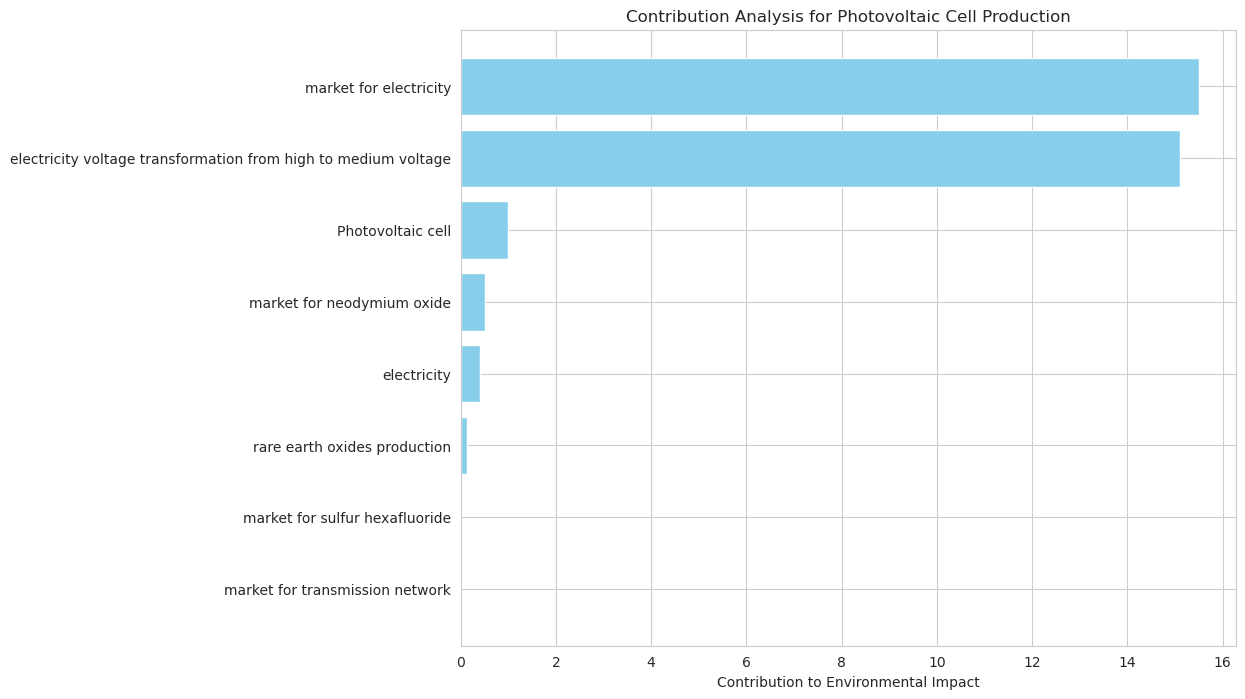

In [150]:
import matplotlib.pyplot as plt
import re
from collections import defaultdict

data = """
1: 'Photovoltaic cell' (unit, GLO, None)
  0.51: 'market for neodymium oxide' (kilogram, GLO, None)
    0.133: 'rare earth oxides production, from rare earth carbonate concentrate' (kilogram, CN-FJ, None)
    ...
  15.5: 'market for electricity, medium voltage' (kilowatt hour, DE, None)
    0.406: 'electricity, from municipal waste incineration to generic market for electricity, medium voltage' (kilowatt hour, DE, None)
    15.1: 'electricity voltage transformation from high to medium voltage' (kilowatt hour, DE, None)
    1.76e-06: 'market for sulfur hexafluoride, liquid' (kilogram, RER, None)
    2.9e-07: 'market for transmission network, electricity, medium voltage' (kilometer, GLO, None)
"""

# Process data to structure it into a dictionary where each key represents a category and the value is the sum of contributions
# Here we use regular expressions to identify the quantities and category names, and a defaultdict to accumulate the quantities
contributions = defaultdict(float)

# Regular expression to match lines with quantities and category names
pattern = re.compile(r"(\d+\.?\d*e?-?\d*): '([^']*)'")

# Go through each line and add the quantity to the corresponding category in the contributions dictionary
for line in data.split('\n'):
    match = pattern.search(line)
    if match:
        quantity = float(match.group(1))
        category = match.group(2)
        # Simplify category names to their main components (e.g., 'market for', 'production of') for grouping
        simplified_category = re.sub(r', .*', '', category).split(", ")[0]
        contributions[simplified_category] += quantity

# Now let's create a bar plot for the contributions
categories = list(contributions.keys())
quantities = list(contributions.values())

# Sort the categories by quantity
sorted_indices = sorted(range(len(quantities)), key=lambda i: quantities[i], reverse=True)
sorted_categories = [categories[i] for i in sorted_indices]
sorted_quantities = [quantities[i] for i in sorted_indices]

# Create the bar plot
plt.figure(figsize=(10, 8))
plt.barh(sorted_categories, sorted_quantities, color='skyblue')
plt.xlabel('Contribution to Environmental Impact')
plt.title('Contribution Analysis for Photovoltaic Cell Production')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest bar on top
plt.show()

### Key Observations:

1. **Electricity Market**:
   - The market for medium voltage electricity, particularly in Germany (DE), shows significant consumption with **15.5 kWh** noted. 
   - The process primarily includes electricity voltage transformation from high to medium voltage, contributing **15.1 kWh**.
   - Even smaller aspects like the market for sulfur hexafluoride and transmission network impact are accounted for, highlighting the thoroughness of the environmental footprint evaluation.

2. **Materials Market**:
   - **Neodymium Oxide**: A notable quantity of **0.51 kg** in the global market indicates its importance in the production of photovoltaic cells.
   - The extraction and production of rare earth oxides, especially from regions like China's Fujian province, are critical subprocesses contributing to this figure.

3. **Transport**:
   - The dataset hints at various transport contributions, such as freight by train, inland waterways, barge, and sea. These modes of transport are pivotal in the supply chain, influencing the environmental footprint due to emissions and energy consumption.

4. **Steel Production**:
   - Steel, both low-alloyed and unalloyed, features prominently with quantities like **2.58 kg** and **44.8 kg** respectively, sourced globally.
   - The production processes in different regions, including India (IN), the Rest of the World (RoW), and within the European grid excluding Switzerland and Austria, have their specific contributiaic cell production.

# Conclusion:

## The Photovoltaic cell process accounts for 0.016063 kg PO4-Eq.

The detailed breakdown allows for a granular analysis of the environmental impact during the manufacturing of photovoltaic cells. It underscores the significance of both direct material usage and associated energy demands in different stages of the supply chain. This comprehensive understanding is vital for any strategies aimed at reducing the ecological footprint and enhancing the sustainability of photovoltaic cell production.